In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

import seaborn as sns
sns.set()

In [12]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../telperion')
from HeartWood import HeartWood

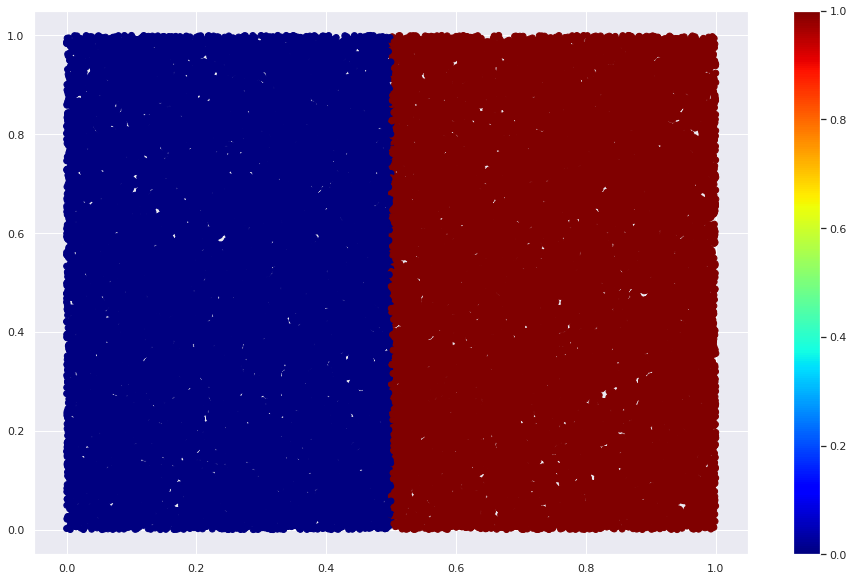

In [13]:
x = np.random.uniform(low=0, high=1, size=(50000,5))
y = np.round(x[:,0])

plt.scatter(x[:,0],x[:,1], c=y, cmap='jet')
plt.colorbar()

In [14]:
hw = HeartWood(x.shape[1])
hw.fit(x, y, 128, 100)

Epoch 1: Loss: 0.151880 Accuracy: 85.15
Epoch 2: Loss: 0.076372 Accuracy: 96.89
Epoch 3: Loss: 0.060603 Accuracy: 97.54
Epoch 4: Loss: 0.052754 Accuracy: 97.99
Epoch 5: Loss: 0.047778 Accuracy: 98.31
Epoch 6: Loss: 0.044239 Accuracy: 98.54
Epoch 7: Loss: 0.041545 Accuracy: 98.72
Epoch 8: Loss: 0.039400 Accuracy: 98.86
Epoch 9: Loss: 0.037635 Accuracy: 98.95
Epoch 10: Loss: 0.036147 Accuracy: 99.04
Epoch 11: Loss: 0.034868 Accuracy: 99.12
Epoch 12: Loss: 0.033752 Accuracy: 99.18
Epoch 13: Loss: 0.032766 Accuracy: 99.22
Epoch 14: Loss: 0.031886 Accuracy: 99.27
Epoch 15: Loss: 0.031094 Accuracy: 99.32
Epoch 16: Loss: 0.030375 Accuracy: 99.37
Epoch 17: Loss: 0.029718 Accuracy: 99.40
Epoch 18: Loss: 0.029114 Accuracy: 99.43
Epoch 19: Loss: 0.028557 Accuracy: 99.46
Epoch 20: Loss: 0.028041 Accuracy: 99.47
Epoch 21: Loss: 0.027560 Accuracy: 99.50
Epoch 22: Loss: 0.027110 Accuracy: 99.52
Epoch 23: Loss: 0.026688 Accuracy: 99.54
Epoch 24: Loss: 0.026292 Accuracy: 99.55
Epoch 25: Loss: 0.025918 

In [15]:
print(hw.W/hw.W.sum())
print()
print(hw.k/hw.W.sum())
print()
print(hw.accuracy(x, y))

[[ 1.00796362e+00]
 [-1.36926798e-03]
 [ 2.31637524e-05]
 [-4.09252239e-03]
 [-2.52498918e-03]]

[[0.4995553]]

0.99858
